# This notebook is for Univariate data analysis
### We will explore the distribution of individual variables (univariate analysis)
### and the relationships between pairs of variables (bivariate analysis).

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets, model_selection, metrics
import scipy as sp
from scipy import stats

from functions import * 

# Print a confirmation message
print("Libraries imported successfully!")

Libraries imported successfully!


# Load datasets

In [2]:
df_demo = pd.read_csv('../data/cleaned/df_final_demo_cleaned.csv')
df_demo.head()

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9
3,1562045,16.0,198.0,49.0,M,2,67454.65,3,6
4,5126305,12.0,145.0,33.0,F,2,103671.75,0,3


In [3]:
df_experiment = pd.read_csv('../data/cleaned/df_final_experiment_clients_cleaned.csv')
df_experiment.head()

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [4]:
df_web = pd.read_csv('../data/cleaned/df_final_web_data_cleaned.csv')
df_web.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


## Univariate analysis
## Question: Are the primary clients younger or older?

In [5]:
# (Nat)age_frequency_table to check : Are the primary clients younger or older?
age_frequency_table = df_demo['age'].value_counts()
age_frequency_table

age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
95.5      1
94.5      1
13.5      1
Name: count, Length: 166, dtype: int64

In [6]:
# (Nat) top 5 age 
top_five_age = age_frequency_table.head()
top_five_age

age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
Name: count, dtype: int64

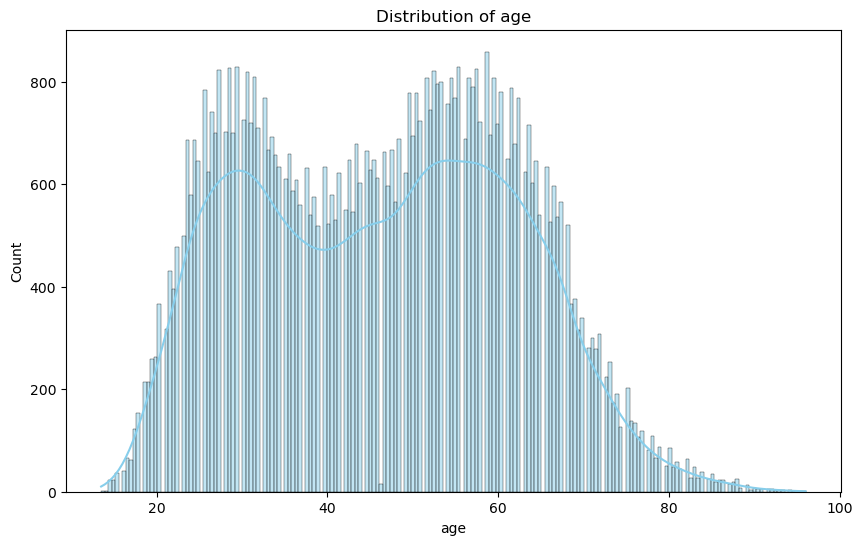

In [7]:
# (Nat) Display the distribution of age using a bar chart. (Seaborn)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo[df_demo['age']<100]["age"], bins=200, kde=True, color="skyblue")
plt.title('Distribution of age')
plt.show()

# Are the primary clients  new or long-standing?

In [8]:
tenure_frequency_table = df_demo['tenure_year'].value_counts()
tenure_frequency_table.head()

tenure_year
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
Name: count, dtype: int64

## Distribution of tenure_year

In [9]:
top_five_tenure = tenure_frequency_table.head()
top_five_tenure 

tenure_year
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
Name: count, dtype: int64

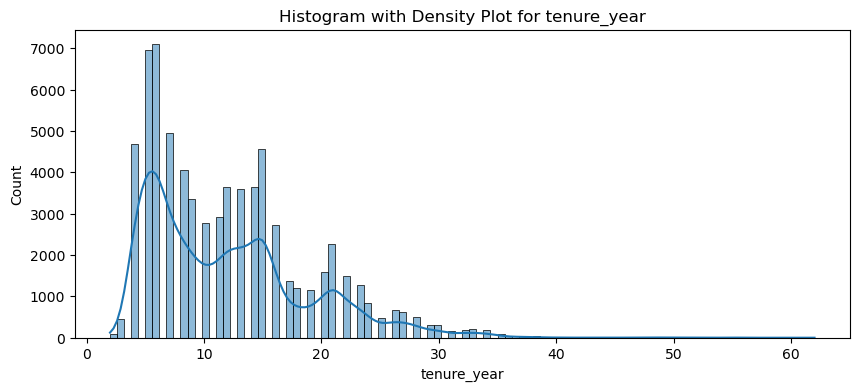

In [11]:
# (Nat)f_1.8.Histogram for visual inspection of distribution and outliers
histogram_with_density_plot(df_demo, 'tenure_year')

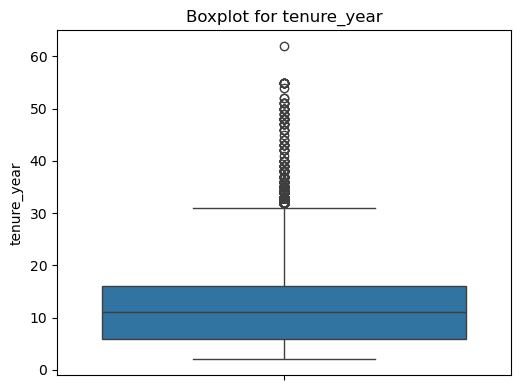

In [30]:
plot_boxplot(df_demo, 'tenure_year')

In [32]:
# (Nat)f_2.0.Shapiro-Wilk test for normality
shapiro_wilk_test(df_demo, 'tenure_year')

Shapiro-Wilk Test for tenure_year: Statistics=0.912, p=0.000
The data does not appear to be normally distributed (reject H0).


## Removing outliers from 'tenure_year'

### 1. Standard Deviation Method.


In [14]:
###  1.Remove outliers with Standard Deviation Method.
def remove_outliers_std(df, column, num_std=3):
    # Calculate the mean and standard deviation
    mean = df[column].mean()
    std_dev = df[column].std()

    # Define outliers as those beyond num_std standard deviations from the mean
    lower_bound = mean - (num_std * std_dev)
    upper_bound = mean + (num_std * std_dev)

    # Filter out outliers
    df_filtered = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    return df_filtered

# Example usage:
df_demo_tenure_clean_std = remove_outliers_std(df_demo, 'tenure_year')


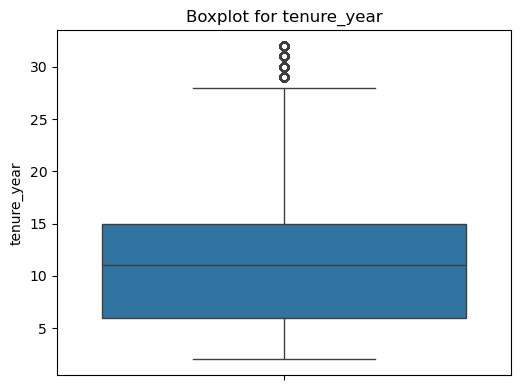

In [15]:
# Example usage:
plot_boxplot(df_demo_tenure_clean_std, 'tenure_year')

### 2. Interquartile Range (IQR) Method

In [16]:
###  2.Remove outliers with Interquartile Range (IQR) Method
def remove_outliers_iqr(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as those below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_filtered = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    return df_filtered

# usage:
df_demo_tenure_clean = remove_outliers_iqr(df_demo, 'tenure_year')

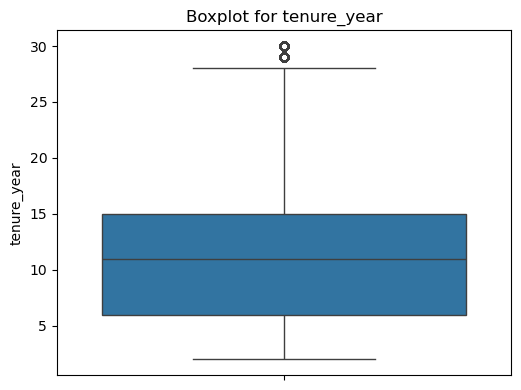

In [17]:
#  usage:
plot_boxplot(df_demo_tenure_clean, 'tenure_year')

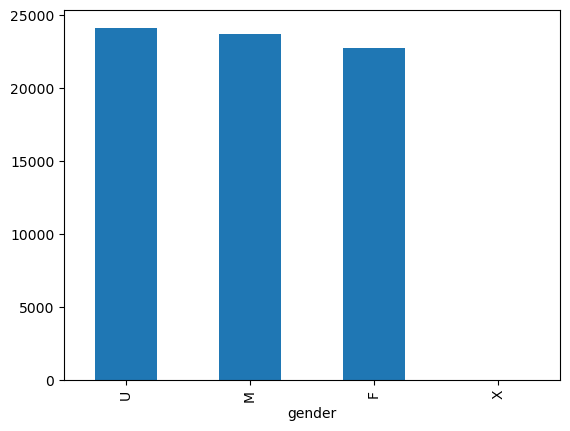

In [18]:
# Gander. Pie chart for visualize proportions for a subset of top categories
gender_frequency_table = df_demo['gender'].value_counts().plot.bar()

In [19]:
number_of_accounts_frequency_table = df_demo['number_of_accounts'].value_counts()
number_of_accounts_frequency_table

number_of_accounts
2    55511
3    12529
4     2241
5      284
6       33
7        8
1        2
8        1
Name: count, dtype: int64

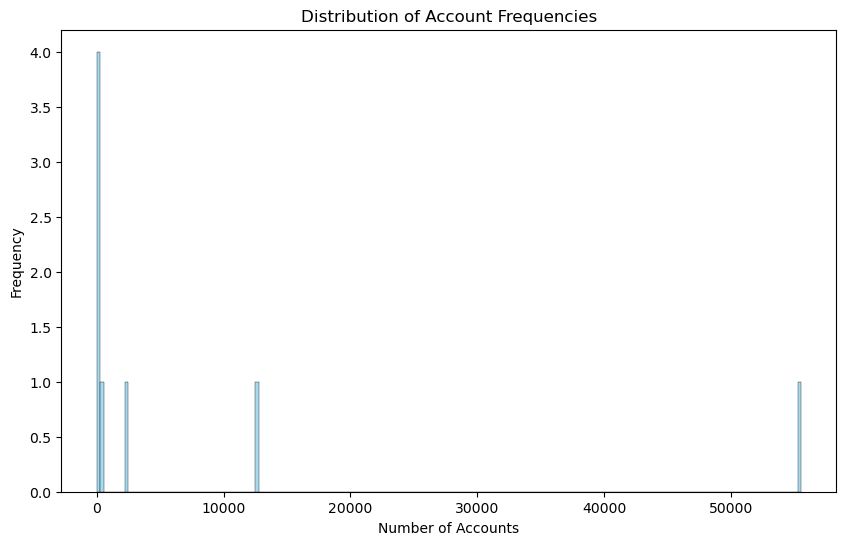

In [20]:

def plot_account_distribution(data, bins=20, kde=False, color="skyblue"):

    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=200, kde=kde, color=color)
    plt.title('Distribution of Account Frequencies')
    plt.xlabel('Number of Accounts')
    plt.ylabel('Frequency')
    plt.show()

plot_account_distribution(number_of_accounts_frequency_table)

## balance

In [21]:
#balance. Numerical. Central Tendency: Mean, median, mode (Provides the average value of a data set.) 
# 1.2. Central Tendency: Calculating the mean, median, and mode 
def calculate_central_tendency(df, column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode() returns a Series, so take the first element

    # Displaying the results
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)


calculate_central_tendency(df_demo, 'balance')

Mean: 147445.2406414052
Median: 63345.55
Mode: 147445.2406414052


In [22]:
# 2.2. Measures of Dispersion 
def calculate_measures_of_dispersion(df, column):
    variance = df[column].var()
    std_dev = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Displaying the results
    print(f"Variance of {column}:", variance)
    print(f"Standard Deviation of {column}:", std_dev)
    print(f"Minimum {column}:", min_val)
    print(f"Maximum {column}:", max_val)
    print(f"1st Quartile (Q1) of {column}:", q1)
    print(f"3rd Quartile (Q3) of {column}:", q3)
    print(f"Interquartile Range (IQR) of {column}:", iqr)

# usage:
calculate_measures_of_dispersion(df_demo, 'balance')

Variance of balance: 90889475173.39915
Standard Deviation of balance: 301478.8138052144
Minimum balance: 13789.419999999998
Maximum balance: 16320040.15
1st Quartile (Q1) of balance: 37350.12
3rd Quartile (Q3) of balance: 137635.52000000002
Interquartile Range (IQR) of balance: 100285.40000000002


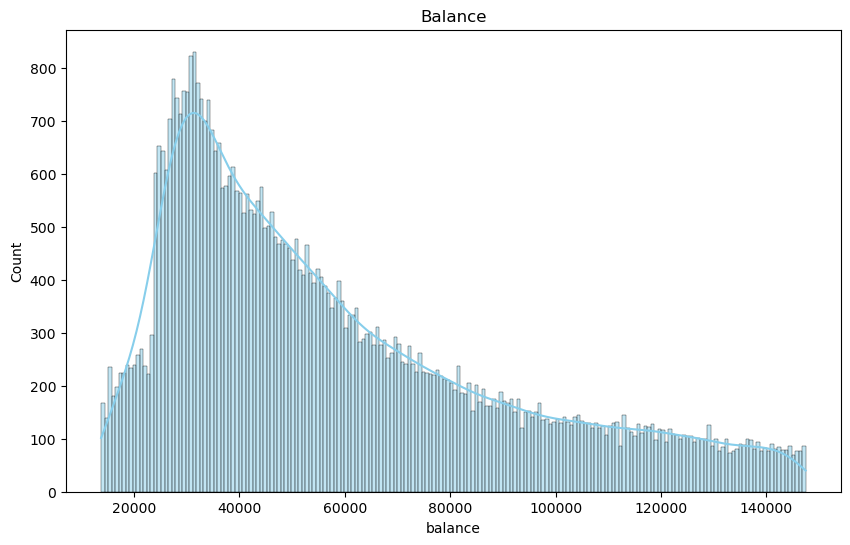

In [23]:
#2.3. Shape of Distribution Numerical  Continuous Variables

plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo[df_demo['balance']<147445]["balance"], bins=200, kde=True, color="skyblue")
plt.title('Balance')
plt.show()

## calls_6_month

In [24]:
#calls_6_month. Numerical.
# 2.1. Central Tendency: Calculating the mean, median, and mode
def calculate_central_tendency(df, column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode() returns a Series, so take the first element

    # Displaying the results
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)
    
calculate_central_tendency(df_demo, 'calls_6_month')

Mean: 3.382401676840063
Median: 3.0
Mode: 6


In [25]:
# 2.2. Measures of Dispersion 
def calculate_measures_of_dispersion(df, column):
    variance = df[column].var()
    std_dev = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Displaying the results
    print(f"Variance of {column}:", variance)
    print(f"Standard Deviation of {column}:", std_dev)
    print(f"Minimum {column}:", min_val)
    print(f"Maximum {column}:", max_val)
    print(f"1st Quartile (Q1) of {column}:", q1)
    print(f"3rd Quartile (Q3) of {column}:", q3)
    print(f"Interquartile Range (IQR) of {column}:", iqr)

# usage:
calculate_measures_of_dispersion(df_demo, 'calls_6_month')

Variance of calls_6_month: 5.00132806939264
Standard Deviation of calls_6_month: 2.236364923126957
Minimum calls_6_month: 0
Maximum calls_6_month: 7
1st Quartile (Q1) of calls_6_month: 1.0
3rd Quartile (Q3) of calls_6_month: 6.0
Interquartile Range (IQR) of calls_6_month: 5.0


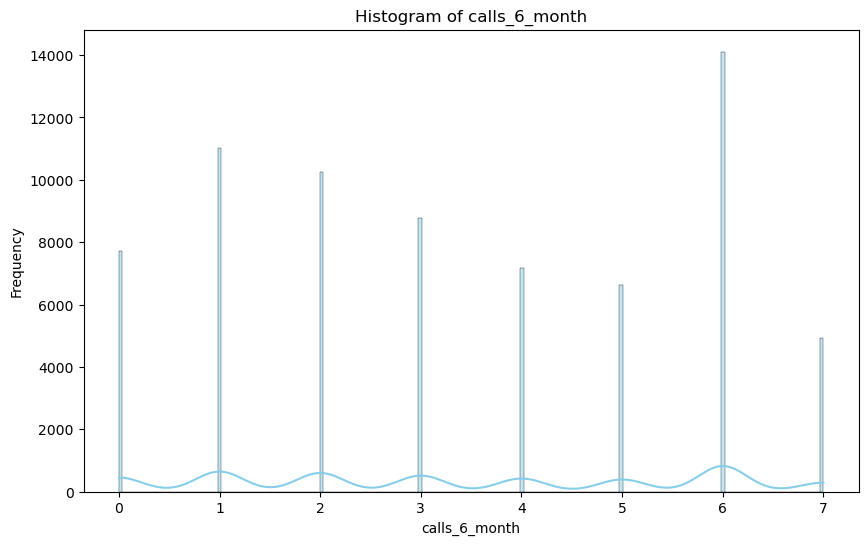

In [26]:
#2.3. Shape of Distribution Numerical  Continuous Variables

def plot_histogram(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=200, kde=True, color="skyblue")
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(df_demo, 'calls_6_month')

## logons_6_month

In [27]:
#logons_6_month. Numerical.
# 1.2. Central Tendency: Calculating the mean, median, and mode
def calculate_central_tendency(df, column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode() returns a Series, so take the first element

    # Displaying the results
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)
    
calculate_central_tendency(df_demo, 'logons_6_month')

Mean: 5.566627483748531
Median: 5.0
Mode: 9


In [28]:
# 2.2. Measures of Dispersion 
def calculate_measures_of_dispersion(df, column):
    variance = df[column].var()
    std_dev = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Displaying the results
    print(f"Variance of {column}:", variance)
    print(f"Standard Deviation of {column}:", std_dev)
    print(f"Minimum {column}:", min_val)
    print(f"Maximum {column}:", max_val)
    print(f"1st Quartile (Q1) of {column}:", q1)
    print(f"3rd Quartile (Q3) of {column}:", q3)
    print(f"Interquartile Range (IQR) of {column}:", iqr)

# usage:
calculate_measures_of_dispersion(df_demo, 'logons_6_month')

Variance of logons_6_month: 5.536919343457412
Standard Deviation of logons_6_month: 2.353065945411945
Minimum logons_6_month: 1
Maximum logons_6_month: 9
1st Quartile (Q1) of logons_6_month: 4.0
3rd Quartile (Q3) of logons_6_month: 7.0
Interquartile Range (IQR) of logons_6_month: 3.0


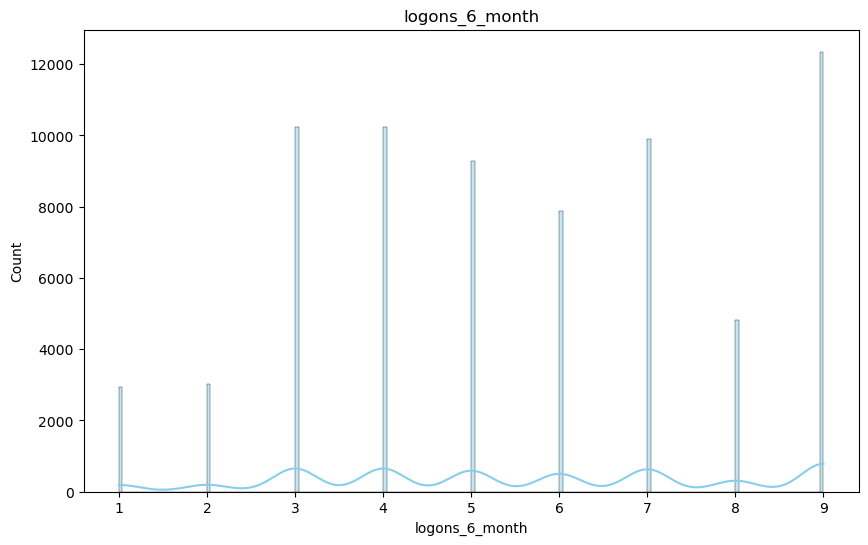

In [29]:
#2.3. Shape of Distribution Numerical  Continuous Variables

plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo[df_demo['logons_6_month']<147445]['logons_6_month'], bins=200, kde=True, color="skyblue")
plt.title('logons_6_month')
plt.show()